In [1]:
%matplotlib inline
import pydna
from Bio.Restriction import BamHI, EcoRV
from gel import Gel, Sample, Q_, randDNAseqs, ladders, ladder_from_info, lindivQ

# For convenience
def printQ(quantities):
    for Q in quantities:
        print Q

In [2]:
gb = pydna.Genbank("pg25220@alunos.uminho.pt") # Tell Genbank who you are!

In [3]:
gene = gb.nucleotide("X06997") # Kluyveromyces lactis LAC12 gene for lactose permease.

In [4]:
primer_f, primer_r = pydna.parse(''' >760_KlLAC12_rv (20-mer)
                                     ttaaacagattctgcctctg

                                     >759_KlLAC12_fw (19-mer)
                                     aaatggcagatcattcgag
                                     ''', ds=False)

In [5]:
pcr_prod = pydna.pcr(primer_f, primer_r, gene)

In [6]:
vector = gb.nucleotide("AJ001614") # pCAPs cloning vector

In [7]:
lin_vector = vector.linearize(EcoRV)

In [8]:
rec_vec = (lin_vector + pcr_prod).looped()

In [9]:
print len(pcr_prod)
print len(rec_vec)
print len(lin_vector)

1766
4894
3128


### Realistic Sample - Unknown Quantities

**Sample:**

**`Sample(solutes=[], quantities=Q_([], 'ng'), volume=Q_(10, 'ul'), endless=False)`**

Rudimentary sample object to serve as DNA container.
Assumptions:
1. Liquid state;
2. Homogeneous;
3. No chemical reaction;
4. Solvent not considered (mere abstraction from volume).

**Note:** `Sample` assumes a volume of **10 ul** by default.

In [10]:
sample1 = Sample([pcr_prod, rec_vec, lin_vector])
print repr(sample1)
print sample1

<sample: vol=10 ul, 3 solutes (nan ng)>
+----------------------------------------------+
|    Solute             Q (ng)  C (ng/ul)  %   |
|----------------------------------------------|
| 0  Amplicon(1766)       nan      nan     nan |
| 1  Dseqrecord(o4894)    nan      nan     nan |
| 2  Dseqrecord(-3128)    nan      nan     nan |
|----------------------------------------------|
| sample volume = 10.0 ul                      |
| solutes quantity = nan ng                    |
+----------------------------------------------+


### Artificial Sample of Known Sizes - Unknown Quantities


In [11]:
sample2 = Sample(randDNAseqs([500, 1000, 5000]))
sample3 = Sample(randDNAseqs([3000, 1500]))
print repr(sample2)
print repr(sample3)

<sample: vol=10 ul, 3 solutes (nan ng)>
<sample: vol=10 ul, 2 solutes (nan ng)>


## Gel

Agarose slab gel electrophoresis.

**`Gel(samples, names, percentgel=Q_(1.0, 'g/ml'), electrfield=Q_(5.0, 'V/cm'), ...)`**

**`G.run(till_len=0.75, till_time=None, exposure=0.5, ...)`**

* **Note 1:**
If no quantity is provided (for all samples) a maximum quantity of **150 ng** is assigned to the longest fragment in each sample.
The quantity of the other fragments is assigned considering linear relation between quantity and size.

* **Note 2:** Assumes by default an agarose concentration of 1.0 g/ml and an electric field intensity of 5.0 V/cm.

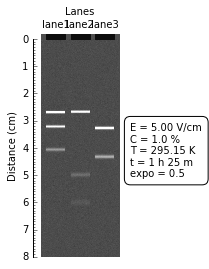

[  54.12750306  150.           95.87249694] ng
[  15.   30.  150.] ng
[ 150.   75.] ng


In [12]:
samples = [sample1, sample2, sample3]
G = Gel(samples)
gelpic = G.run()
gelpic.show()
printQ(G.quantities)

### Ladder Standard ###

**`ladder_from_info(key, qty=<Quantity(500, 'nanogram')>, vol=<Quantity(12, 'microliter')>)`**

Creates a `Sample` respecting the sizes and mass fractions of the ladder standards stored in the dictionary `ladders`.

In [13]:
ladders.keys()

['Mix_GeneRuler', '1kb+_GeneRuler', 'High_Range_GeneRuler', '1kb_GeneRuler']

In [14]:
ladder = ladder_from_info('1kb_GeneRuler')
print ladder

+-----------------------------------------------------------------+
|     Solute                              Q (ng)  C (ng/ul)   %   |
|-----------------------------------------------------------------|
|  0  Dseq(-10000)/ctaa..tcac/gatt..agtg   30.0     2.50      6.0 |
|  1  Dseq(-8000)/taac..gggc/attg..cccg    30.0     2.50      6.0 |
|  2  Dseq(-6000)/gagt..cgct/ctca..gcga    70.0     5.83     14.0 |
|  3  Dseq(-5000)/gtat..ccac/cata..ggtg    30.0     2.50      6.0 |
|  4  Dseq(-4000)/gaac..ctaa/cttg..gatt    30.0     2.50      6.0 |
|  5  Dseq(-3500)/ccta..gaga/ggat..ctct    30.0     2.50      6.0 |
|  6  Dseq(-3000)/ctca..tcgt/gagt..agca    70.0     5.83     14.0 |
|  7  Dseq(-2500)/gttc..ccac/caag..ggtg    25.0     2.08      5.0 |
|  8  Dseq(-2000)/ttaa..cacc/aatt..gtgg    25.0     2.08      5.0 |
|  9  Dseq(-1500)/atgc..tcgc/tacg..agcg    25.0     2.08      5.0 |
| 10  Dseq(-1000)/ttta..tgtg/aaat..acac    60.0     5.00     12.0 |
| 11  Dseq(-750)/gctc..tttc/cgag..aaag     25.0 

**Gel**

**Note:**
If the quantities of some samples are provided (the ladder in this case) the maximum quantity provided is taken as reference for the longest fragment of each sample with unknown quantities (in order to keep them in the same scale).
The quantity of the other fragments is assigned considering linear relation between quantity and size.

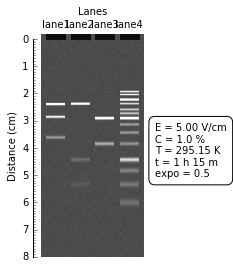

[ 25.25950143  70.          44.74049857] ng
[  7.  14.  70.] ng
[ 70.  35.] ng
[ 30.  30.  70.  30.  30.  30.  70.  25.  25.  25.  60.  25.  25.  25.] ng


In [15]:
samples = [sample1, sample2, sample3, ladder]
G = Gel(samples)
gelpic = G.run()
gelpic.show()
printQ(G.quantities)

### Assigning Quantities

#### By Hand

**Note:** If no units are provided, nanograms are assumed.



In [16]:
dseqs3 = randDNAseqs([3000, 1500])
qts3 = [100, 100]
sample3 = Sample(dseqs3, qts3, Q_(14, 'ul'))
print sample3

+---------------------------------------------------------------+
|    Solute                             Q (ng)  C (ng/ul)   %   |
|---------------------------------------------------------------|
| 0  Dseq(-3000)/accc..tctt/tggg..agaa  100.0     7.14     50.0 |
| 1  Dseq(-1500)/cagt..gact/gtca..ctga  100.0     7.14     50.0 |
|---------------------------------------------------------------|
| sample volume = 14.0 ul                                       |
| solutes quantity = 200.0 ng                                   |
+---------------------------------------------------------------+


#### Linearly Dividing a Total Quantity

**Note:** For fragments resulting from a digestion with restriction enzyme procedure, for example, the mass of the fragments is proportional to their size. Lets assume that is the case and that we have a total mass of 200 ng.

In [17]:
dseqs2 = randDNAseqs([500, 1000, 5000])
qts2 = lindivQ(dseqs2, 200)
sample2 = Sample(dseqs2, qts2, Q_(14, 'ul'))
print sample2

+---------------------------------------------------------------+
|    Solute                             Q (ng)  C (ng/ul)   %   |
|---------------------------------------------------------------|
| 0  Dseq(-500)/ccct..ccaa/ggga..ggtt    15.4     1.10      7.7 |
| 1  Dseq(-1000)/atca..atgg/tagt..tacc   30.8     2.20     15.4 |
| 2  Dseq(-5000)/aaaa..catg/tttt..gtac  153.8    10.99     76.9 |
|---------------------------------------------------------------|
| sample volume = 14.0 ul                                       |
| solutes quantity = 200.0 ng                                   |
+---------------------------------------------------------------+


**Gel**

**Note:**
Notice the quantities now. They were all previously assigned with the exception of `sample1` (the realistic one) which assumed 153.85 ng as the mass of its longest fragment.

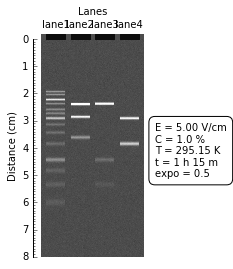

[ 30.  30.  70.  30.  30.  30.  70.  25.  25.  25.  60.  25.  25.  25.] ng
[  55.51538776  153.84615385   98.33076609] ng
[  15.38461538   30.76923077  153.84615385] ng
[100 100] ng


In [18]:
samples = [ladder, sample1, sample2, sample3]
G = Gel(samples)
gelpic = G.run()
gelpic.show()
printQ(G.quantities)